# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA and preproecessing](#3)
- [4. Feature Scaling](#4)
- [5. Feature Engineering](#5)
- [6. Assigning Feature and target variables](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Gradient Boosting](#9.1)
    - [9.2 Logistic Regression](#9.2)
    - [9.3 Random Forest](#9.3)
    - [9.4 KNN](#9.4)
    - [9.5 Bagging](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id='2'></a>
# Import Necssaries Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

c:\Users\AbanobMorgan\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a id='3'></a>
# EDA and preprocessing

In [2]:
df = pd.read_csv('creditcard.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(f"data has {df.shape[0]} rows and {df.shape[1]} columns")

data has 284807 rows and 31 columns


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 75% or more of the classes column are = 0 which is something tricky

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

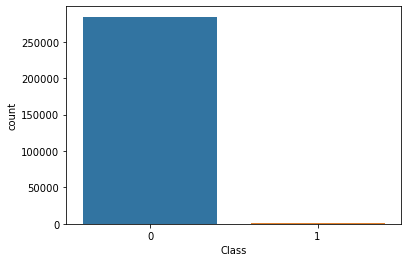

In [8]:
sns.countplot(x='Class', data=df);

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Data is Highly Unbalanced

In [10]:
df.columns[df.isna().any()]

Index([], dtype='object')

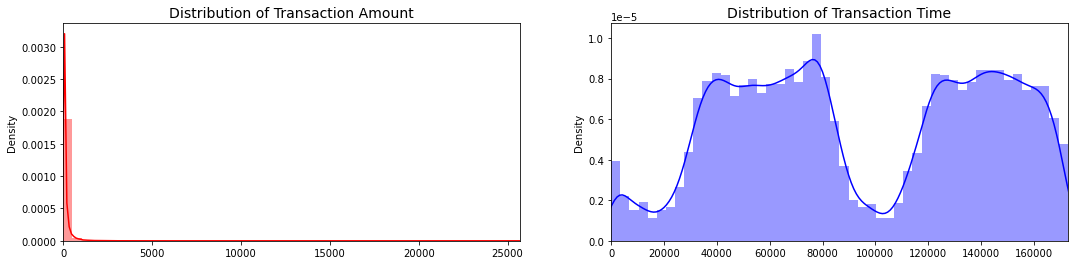

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Build a sample dataset containing similar distribution of normal transactions 


getting a non_fraud sample that equals to the fraud one to make the data balanced

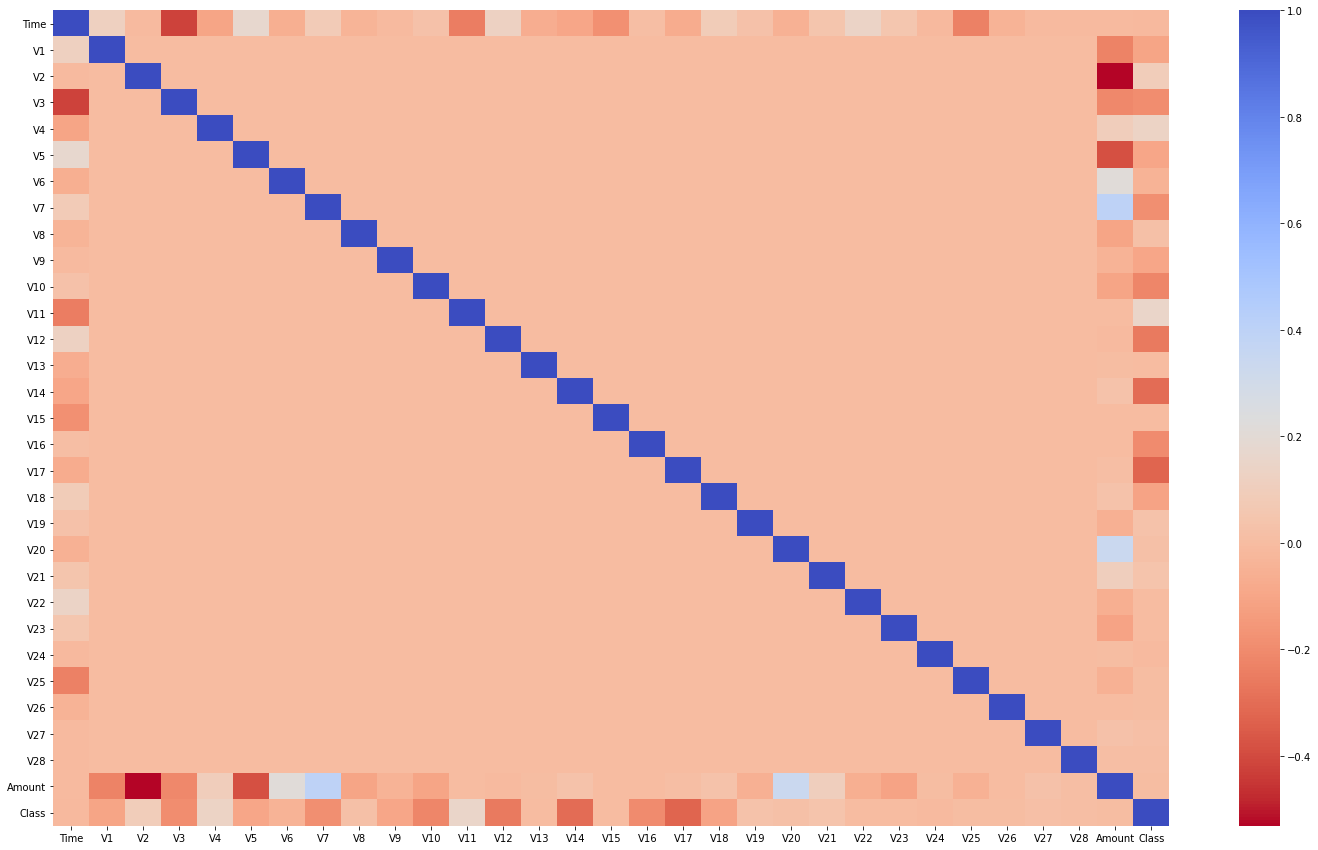

In [12]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

In [13]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [14]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
legit_sample = legit.sample(492)

In [16]:
legit_sample.count()[0]

492

In [17]:
balanced_df = pd.concat([legit_sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255397,157206.0,2.158474,-0.813716,-0.970729,-0.504012,-0.604225,-0.325910,-0.693967,-0.113344,-0.148786,...,-0.387839,-0.542466,0.291825,0.469390,-0.320374,0.541157,-0.038676,-0.046457,16.20,0
266229,162243.0,1.988035,0.360308,-2.689851,1.345122,1.325326,-0.517246,0.725223,-0.302660,0.160054,...,-0.057589,-0.061833,-0.127128,-0.146708,0.564839,-0.481421,-0.010951,-0.021064,56.65,0
225413,144237.0,2.000230,-0.338868,-0.451921,0.360279,-0.364644,-0.056192,-0.582873,-0.019800,1.299967,...,0.187674,0.816420,0.116059,0.631288,-0.012612,-0.240441,0.043885,-0.028856,9.99,0
87091,61533.0,-5.714427,0.535493,-0.824967,-0.084997,0.060769,1.174598,-0.018950,0.297866,1.359603,...,-0.087392,0.067131,-0.788048,-1.674580,0.173331,-0.751913,-4.209358,0.430512,15.00,0
6654,8211.0,1.159293,0.233976,0.486092,0.797219,-0.325684,-0.394302,-0.316840,0.100131,1.337545,...,-0.368559,-0.912259,0.207639,0.069154,-0.003149,0.062144,-0.049541,0.008505,0.89,0


In [18]:
balanced_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

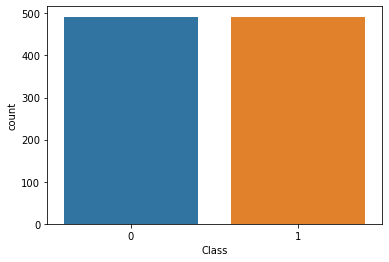

In [19]:
sns.countplot(x='Class', data=balanced_df);

now we have equal number of legal and fraud that's how we convert our data from un-balanced to balanced data

In [20]:
balanced_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94300.715447,0.089910,-0.090063,-0.039015,0.069567,0.145708,-0.007457,-0.013155,-0.031390,0.046818,...,0.011443,0.013788,-0.019376,-0.018291,-0.023969,0.025536,-0.020448,0.027289,-0.002400,86.593598
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


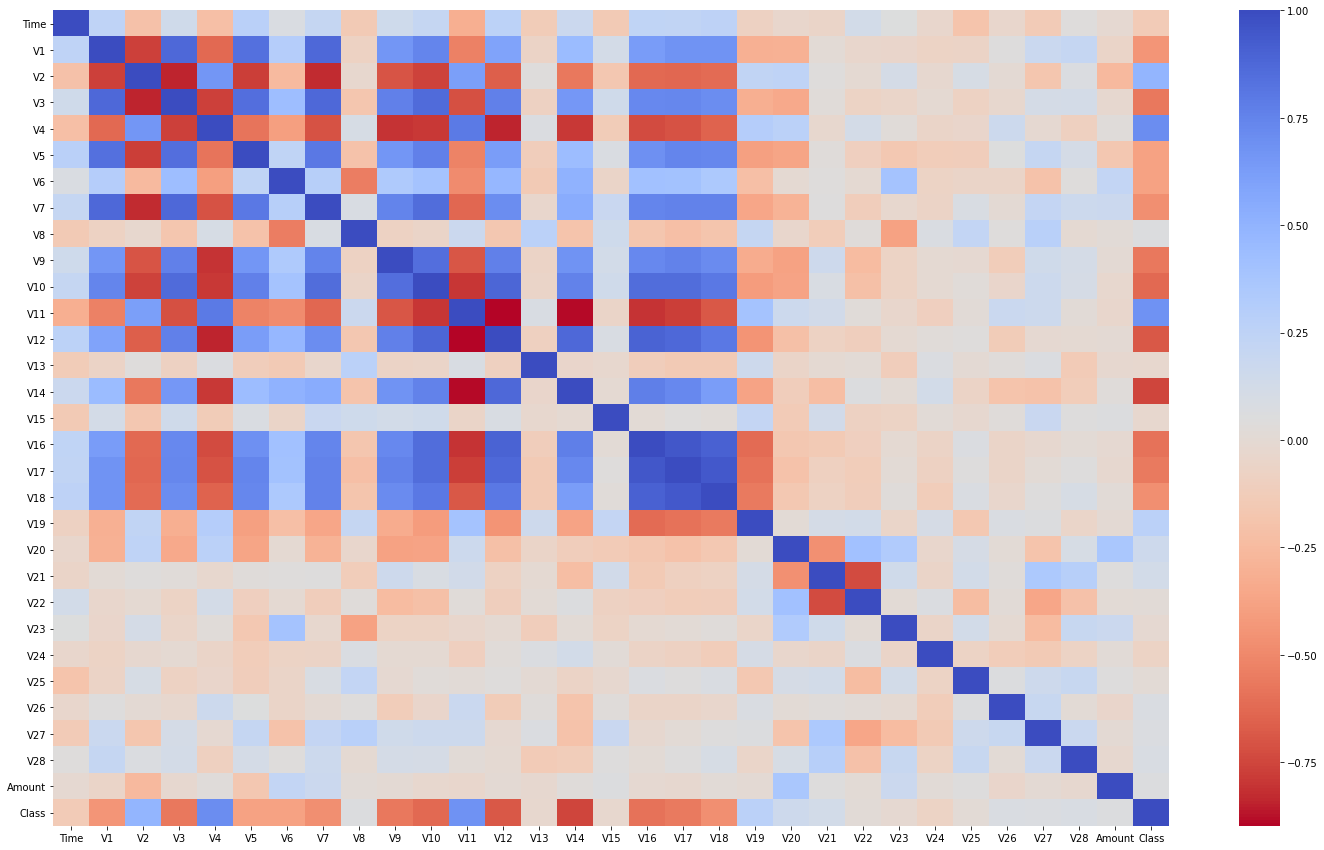

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(balanced_df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

look at the diffrence correlation between imbalanced df and balanced df<br>
Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)<br>
Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

V17, V14, V12, V10 are negative correlated to Class let's visualize those features
V2, V4, V19, V11 are Positive correlated to Class let's visualize those features

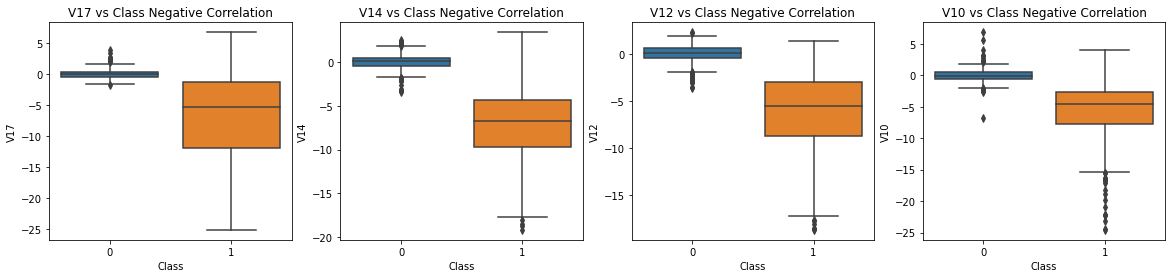

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=balanced_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=balanced_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=balanced_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=balanced_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

it seems those V's when they are netagive values it is Fraud transaction

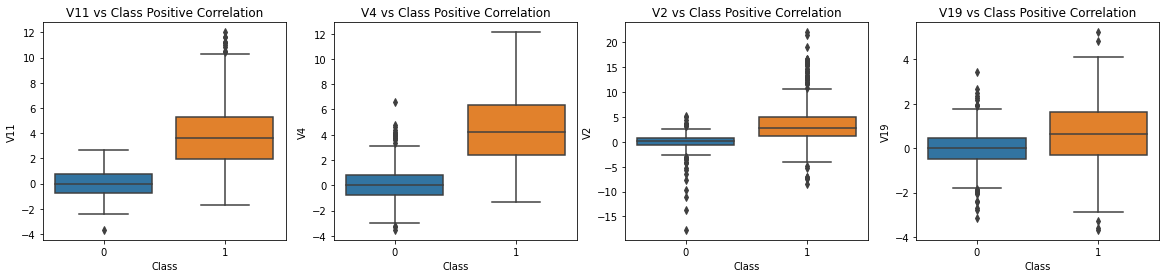

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=balanced_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=balanced_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=balanced_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=balanced_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

it seems those V's when they are highly Postive values it is Fraud transaction

<a id='4'></a>
# Feature Scaling

In [24]:
std_scaler = StandardScaler()
balanced_df['scaled_amount'] = std_scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['scaled_time'] = std_scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df = balanced_df.drop(["Amount", "Time"],axis=1)

<a id='5'></a>
# Feature Engineering

In [25]:
FEATURES = [col for col in balanced_df.columns if col not in ['Class']]
balanced_df["mean"] = balanced_df[FEATURES].mean(axis=1)
balanced_df["std"] = balanced_df[FEATURES].std(axis=1)
balanced_df["min"] = balanced_df[FEATURES].min(axis=1)
balanced_df["max"] = balanced_df[FEATURES].max(axis=1)

<a id='6'></a>
# Assign Feature and Target variables 

In [26]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df.Class

In [27]:
balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,mean,std,min,max
255397,2.158474,-0.813716,-0.970729,-0.504012,-0.604225,-0.325910,-0.693967,-0.113344,-0.148786,0.847234,...,0.541157,-0.038676,-0.046457,0,-0.298146,1.435514,-0.094411,0.766536,-1.376989,2.158474
266229,1.988035,0.360308,-2.689851,1.345122,1.325326,-0.517246,0.725223,-0.302660,0.160054,-0.385130,...,-0.481421,-0.010951,-0.021064,0,-0.161415,1.539281,0.032999,0.874868,-2.689851,1.988035
225413,2.000230,-0.338868,-0.451921,0.360279,-0.364644,-0.056192,-0.582873,-0.019800,1.299967,-0.205793,...,-0.240441,0.043885,-0.028856,0,-0.319138,1.168342,0.152869,0.672555,-0.996724,2.000230
87091,-5.714427,0.535493,-0.824967,-0.084997,0.060769,1.174598,-0.018950,0.297866,1.359603,1.642561,...,-0.751913,-4.209358,0.430512,0,-0.302203,-0.535432,-0.404686,1.469103,-5.714427,1.642561
6654,1.159293,0.233976,0.486092,0.797219,-0.325684,-0.394302,-0.316840,0.100131,1.337545,-0.470716,...,0.062144,-0.049541,0.008505,0,-0.349898,-1.633911,0.072140,0.948745,-2.475427,2.647975


In [28]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,scaled_amount,scaled_time,mean,std,min,max
255397,2.158474,-0.813716,-0.970729,-0.504012,-0.604225,-0.325910,-0.693967,-0.113344,-0.148786,0.847234,...,-0.320374,0.541157,-0.038676,-0.046457,-0.298146,1.435514,-0.094411,0.766536,-1.376989,2.158474
266229,1.988035,0.360308,-2.689851,1.345122,1.325326,-0.517246,0.725223,-0.302660,0.160054,-0.385130,...,0.564839,-0.481421,-0.010951,-0.021064,-0.161415,1.539281,0.032999,0.874868,-2.689851,1.988035
225413,2.000230,-0.338868,-0.451921,0.360279,-0.364644,-0.056192,-0.582873,-0.019800,1.299967,-0.205793,...,-0.012612,-0.240441,0.043885,-0.028856,-0.319138,1.168342,0.152869,0.672555,-0.996724,2.000230
87091,-5.714427,0.535493,-0.824967,-0.084997,0.060769,1.174598,-0.018950,0.297866,1.359603,1.642561,...,0.173331,-0.751913,-4.209358,0.430512,-0.302203,-0.535432,-0.404686,1.469103,-5.714427,1.642561
6654,1.159293,0.233976,0.486092,0.797219,-0.325684,-0.394302,-0.316840,0.100131,1.337545,-0.470716,...,-0.003149,0.062144,-0.049541,0.008505,-0.349898,-1.633911,0.072140,0.948745,-2.475427,2.647975


<a id='7'></a>
# Split the data into Training and Testing Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200)

In [30]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")

We have 738 Training data
We have 246 Testing data


<a id='8'></a>
# Modeling

In [31]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [32]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 92.78705421562566%
Logistic Regression model score on Training data: 94.98644986449864%
Logistic Regression model score on Testing data: 95.9349593495935%


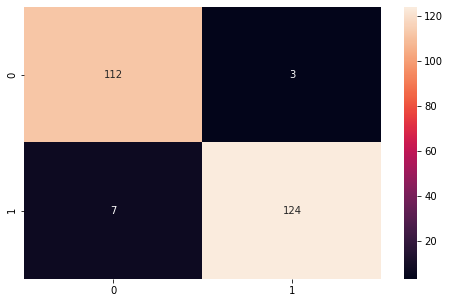

In [33]:
conf_matrix(lr_model)

In [34]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       115
           1       0.98      0.95      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



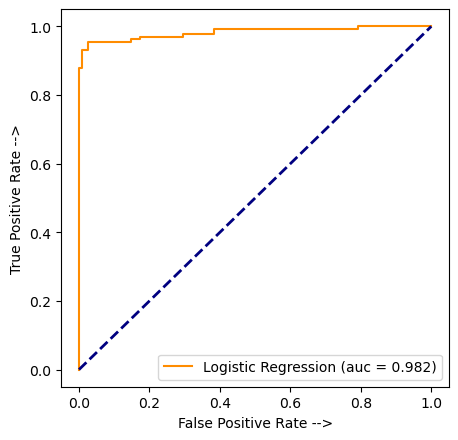

In [35]:
roc(lr_model, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [36]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 93.6940836940837%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 93.90243902439023%


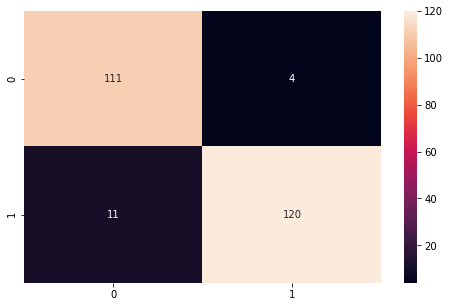

In [37]:
conf_matrix(rf_model)

In [38]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.97      0.92      0.94       131

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



<a id='8.3'></a>
## KNN

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 93.18800247371676%
KNN model score on Training data: 95.6639566395664%
KNN model score on Testing data: 94.71544715447155%


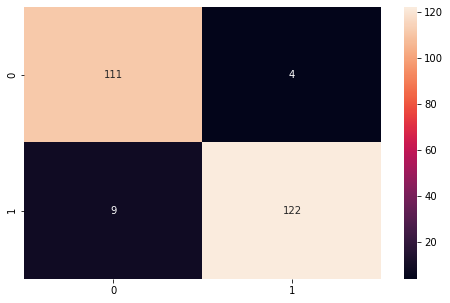

In [40]:
conf_matrix(knn_model)

In [41]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.93      0.97      0.94       115
           1       0.97      0.93      0.95       131

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



<a id='8.4'></a>
## Bagging

In [42]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 93.69408369408369%
Bagging model score on Training data: 99.59349593495935%
Bagging model score on Testing data: 93.4959349593496%


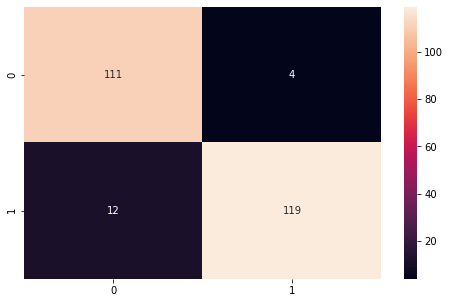

In [43]:
conf_matrix(bagg_model)

In [44]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.97      0.91      0.94       131

    accuracy                           0.93       246
   macro avg       0.93      0.94      0.93       246
weighted avg       0.94      0.93      0.94       246



<a id='8.5'></a>
## Gradient Boosting

In [45]:
gb_model = GradientBoostingClassifier()
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 93.89507318078746%
Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 93.90243902439023%


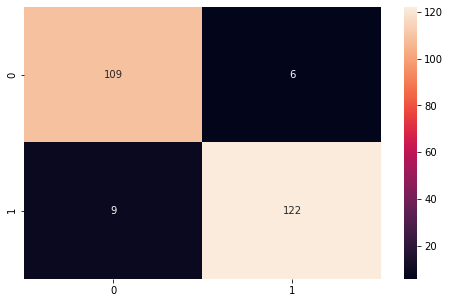

In [46]:
conf_matrix(gb_model)

In [47]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       115
           1       0.95      0.93      0.94       131

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



<a id='8.6'></a>
## Decision Tree 

In [48]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 89.32385075242217%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 91.05691056910568%


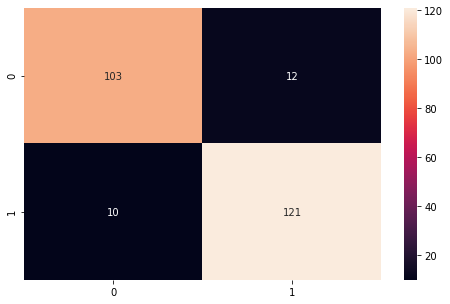

In [49]:
conf_matrix(dt_model)

In [50]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       115
           1       0.91      0.92      0.92       131

    accuracy                           0.91       246
   macro avg       0.91      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246



<a id='8.7'></a>
## SVM

In [51]:
svm_model = SVC(kernel='linear', gamma='auto')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 92.38095238095238%
SVM model score on Training data: 95.1219512195122%
SVM model score on Testing data: 95.9349593495935%


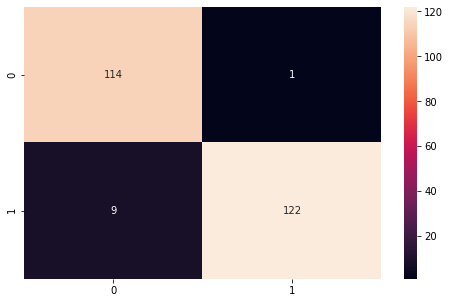

In [52]:
conf_matrix(svm_model)

In [53]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       115
           1       0.99      0.93      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



In [54]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       115
           1       0.99      0.93      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



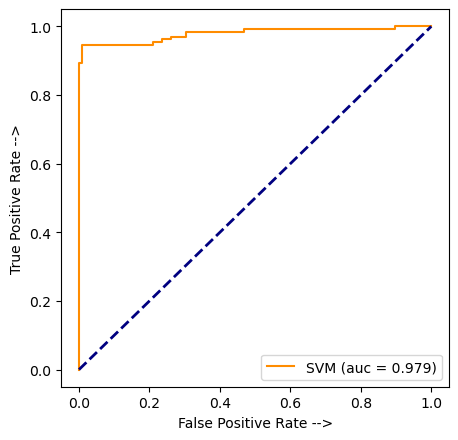

In [55]:
roc(svm_model, "SVM")

<a id='9'></a>
# TP, TN, FP, FN

In [56]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    Accuarcy = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {Accuarcy*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [57]:
tp(lr_model, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 95.9349593495935%
Sensitivity Accuarcy of Logistic Regression: 94.65648854961832%
Specificity Negative Rate Accuarcy of Logistic Regression: 97.3913043478261%
Negative predictive value Accuarcy of Logistic Regression: 94.11764705882352%
Fall out Accuarcy of Logistic Regression: 2.608695652173913%
False negative rate Accuarcy of Logistic Regression: 5.343511450381679%
False discovery rate Accuarcy of Logistic Regression: 2.3622047244094486%


<a id='9.1'></a>
## Random Forest

In [58]:
tp(rf_model, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 93.90243902439023%
Sensitivity Accuarcy of Random Forest: 91.6030534351145%
Specificity Negative Rate Accuarcy of Random Forest: 96.52173913043478%
Negative predictive value Accuarcy of Random Forest: 90.98360655737704%
Fall out Accuarcy of Random Forest: 3.4782608695652173%
False negative rate Accuarcy of Random Forest: 8.396946564885496%
False discovery rate Accuarcy of Random Forest: 3.225806451612903%


<a id='9.3'></a>
## KNN

In [59]:
tp(knn_model, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 94.71544715447155%
Sensitivity Accuarcy of KNN: 93.12977099236642%
Specificity Negative Rate Accuarcy of KNN: 96.52173913043478%
Negative predictive value Accuarcy of KNN: 92.5%
Fall out Accuarcy of KNN: 3.4782608695652173%
False negative rate Accuarcy of KNN: 6.870229007633588%
False discovery rate Accuarcy of KNN: 3.1746031746031744%


<a id='9.4'></a>
## Bagging

In [60]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 93.4959349593496%
Sensitivity Accuarcy of Bagging: 90.83969465648855%
Specificity Negative Rate Accuarcy of Bagging: 96.52173913043478%
Negative predictive value Accuarcy of Bagging: 90.2439024390244%
Fall out Accuarcy of Bagging: 3.4782608695652173%
False negative rate Accuarcy of Bagging: 9.16030534351145%
False discovery rate Accuarcy of Bagging: 3.2520325203252036%


<a id='9.5'></a>
## Gradient Boosting

In [61]:
tp(gb_model, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 93.90243902439023%
Sensitivity Accuarcy of Gradient Boosting: 93.12977099236642%
Specificity Negative Rate Accuarcy of Gradient Boosting: 94.78260869565217%
Negative predictive value Accuarcy of Gradient Boosting: 92.37288135593221%
Fall out Accuarcy of Gradient Boosting: 5.217391304347826%
False negative rate Accuarcy of Gradient Boosting: 6.870229007633588%
False discovery rate Accuarcy of Gradient Boosting: 4.6875%


<a id='9.6'></a>
## Decision Tree

In [62]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 91.05691056910568%
Sensitivity Accuarcy of Decision Tree: 92.36641221374046%
Specificity Negative Rate Accuarcy of Decision Tree: 89.56521739130436%
Negative predictive value Accuarcy of Decision Tree: 91.1504424778761%
Fall out Accuarcy of Decision Tree: 10.434782608695652%
False negative rate Accuarcy of Decision Tree: 7.633587786259542%
False discovery rate Accuarcy of Decision Tree: 9.022556390977442%


<a id='9.7'></a>
## SVM

In [63]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 95.9349593495935%
Sensitivity Accuarcy of SVM: 93.12977099236642%
Specificity Negative Rate Accuarcy of SVM: 99.1304347826087%
Negative predictive value Accuarcy of SVM: 92.6829268292683%
Fall out Accuarcy of SVM: 0.8695652173913043%
False negative rate Accuarcy of SVM: 6.870229007633588%
False discovery rate Accuarcy of SVM: 0.8130081300813009%


<a id='10'></a>
# Auto Machine Learning

In [65]:
tpot_model = TPOTClassifier(generations=5, population_size=100, cv=5,
                                    random_state=42, verbosity=2, scoring='accuracy')
train(tpot_model, "Automated Machine Learning")

                                                                              
Generation 1 - Current best internal CV score: 0.9485475271189557
                                                                              
Generation 2 - Current best internal CV score: 0.9485475271189557
                                                                              
Generation 3 - Current best internal CV score: 0.9485475271189557
                                                                              
Generation 4 - Current best internal CV score: 0.9485475271189557
                                                                              
Generation 5 - Current best internal CV score: 0.9485475271189557
                                                                              
Best pipeline: MLPClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), alpha=0.1, learning_rate_init=0.01)
Automated Machine Learning model score on T

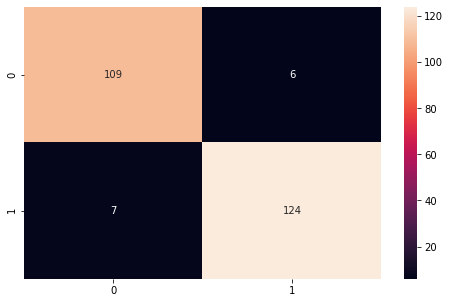

In [66]:
conf_matrix(tpot_model)

In [67]:
class_report(tpot_model)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       115
           1       0.95      0.95      0.95       131

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



In [68]:
tp(tpot_model, "Automated ML")

TP, FN, TP, FP Overall Accuarcy of Automated ML: 94.71544715447155%
Sensitivity Accuarcy of Automated ML: 94.65648854961832%
Specificity Negative Rate Accuarcy of Automated ML: 94.78260869565217%
Negative predictive value Accuarcy of Automated ML: 93.96551724137932%
Fall out Accuarcy of Automated ML: 5.217391304347826%
False negative rate Accuarcy of Automated ML: 5.343511450381679%
False discovery rate Accuarcy of Automated ML: 4.615384615384616%
